# ANOVA and Chi Square 

### Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [4]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style('whitegrid')

In [2]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

### a)  Plot box plot for the above data and write your inference on the group means from the boxplots.

In [5]:
life_type = pd.DataFrame()

df1            = pd.DataFrame({'Type': 'A', 'Life_hours':life_type_A})
df2            = pd.DataFrame({'Type': 'B', 'Life_hours':life_type_B})
df3            = pd.DataFrame({'Type': 'C', 'Life_hours':life_type_C})

life_type = life_type.append(df1) 
life_type = life_type.append(df2) 
life_type = life_type.append(df3) 
life_type.head()

,Type,Life_hours
0,A,407
1,A,411
2,A,409
0,B,404
1,B,406


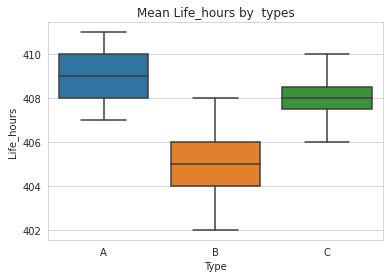

In [7]:
sns.boxplot(x = "Type", y = "Life_hours", data = life_type)
plt.title('Mean Life_hours by  types')
plt.show()

### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [8]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Life_hours ~ Type', data = life_type).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


          sum_sq   df    F    PR(>F)
Type        36.0  2.0  4.5  0.044194
Residual    36.0  9.0  NaN       NaN


### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

### Practice Exercise 2

### A sample of number of sell of a particular product over different days in different stores have been collected.Perform a test to check whether different stores and different days have any effect on the number of products that have been sold.

In [14]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

In [15]:

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

   Day  Store-A  Store-B  Store-C  Store-D  Store-E
0    1       69       71       64       67       56
1    2       68       76       79       87       76
2    3       71       77       74       84       72
3    4       70       73       71       78       73
4    5       60       64       67       79       58


There are two independent variables, Day and Store.
Two-way ANOVA determines how a response  is affected by two factors.
So we use 2-way ANOVA without replication since each cell has only one observation.

In [16]:
d0_val  = df1['Day'].values
d1_val  = df1['Store-A'].values
d2_val  = df1['Store-B'].values
d3_val  = df1['Store-C'].values
d4_val  = df1['Store-D'].values
d5_val  = df1['Store-E'].values



df1     = pd.DataFrame({'Day': d0_val, 'Store':'A', 'Qual': d1_val})
df2     = pd.DataFrame({'Day': d0_val, 'Store':'B', 'Qual': d2_val})
df3     = pd.DataFrame({'Day': d0_val, 'Store':'C', 'Qual': d3_val})
df4     = pd.DataFrame({'Day': d0_val, 'Store':'D', 'Qual': d4_val})
df5     = pd.DataFrame({'Day': d0_val, 'Store':'E', 'Qual': d5_val})

final_df  = pd.DataFrame()

final_df  = final_df.append(df1) 
final_df  = final_df.append(df2) 
final_df  = final_df.append(df3) 
final_df  = final_df.append(df4) 
final_df  = final_df.append(df5) 


pd.DataFrame(final_df)

,Day,Store,Qual
0,1,A,69
1,2,A,68
2,3,A,71
3,4,A,70
4,5,A,60
0,1,B,71
1,2,B,76
2,3,B,77
3,4,B,73
4,5,B,64


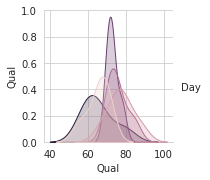

In [18]:
sns.pairplot(final_df,hue='Day')

## Chi Square

### Practice Exercise 3

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [20]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([190, 185, 90, 35])
n                  = observed_values.sum()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  after removing the cwd from sys.path.


Null hypothesis:  H0 : Meal preference is as per the operations manager

Alternative hypothesis:  HA : Meal preference is different from the desired preference as per the operations manager

In [25]:
# alpha= 0.05

observed= scipy.array([190, 185, 90, 35])
n= 500

expected= scipy.array([n*0.3, n*.45, n*0.2, n*0.05])

chi_square_stat, p_value = stats.chisquare(observed, f_exp=expected)

print('P value is',  p_value)

P value is 4.492718590376291e-05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


P value is less than 0.05 so we reject the null hypothesis

### Chi-square tests of independence

### Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [26]:
import numpy       as np
import scipy.stats as stats

churn_array = np.array([[15,142],[24, 400],[30, 389]])


In [28]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(churn_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 2.77998 P value 0.249078 Degrees of freedom 2


here p value is more than 0.05 so we accept the null hypothesis

## E N D  